# Optimizing Operations: Insights into Revenue and Driver Productivity in Fuel Delivery

## Introduction

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from matplotlib import pyplot as plt

import warnings

warnings.filterwarnings("ignore")

### Columns in Dataset

1.	**delivery_id**: A unique identifier for each delivery transaction, ensuring that each delivery is recorded individually.

2.	**date**: The date on which the delivery took place, useful for tracking delivery timelines and seasonal trends.

3.	**customer_id**: A unique identifier for each customer receiving a delivery, which allows tracking of deliveries per customer.

4.	**truck_id**: A unique identifier for each truck used in the delivery, which helps track vehicle usage and maintenance needs.

5.	**fuel_type_delivered**: The type of fuel being delivered (e.g., diesel, gasoline, etc.), useful for tracking inventory and demand for different fuel types.

6.	**delivery_city**: The city where the fuel delivery is made, helping with regional analysis and logistics planning.

7.	**distance_km**: The distance, in kilometers, from the starting point (such as a fuel depot) to the delivery location. This can affect delivery time, cost, and driver scheduling.

8.	**fuel_amount_delivered_liters**: The amount of fuel delivered in liters, providing information on delivery size and customer fuel needs.

9.	**fuel_rate_per_liter**: The rate charged per liter of fuel, likely influenced by market prices and negotiated customer rates.

10.	**delivery_revenue**: The total revenue generated from the delivery, calculated by multiplying the fuel amount by the rate per liter. This helps in assessing profitability.

11.	**driver_id**: A unique identifier for the driver assigned to the delivery, useful for performance tracking and scheduling.

12.	**delivery_time_hours**: The duration of the delivery in hours, from the starting point to the destination, helping analyze efficiency and optimize routes.

13.	**delivery_cost**: The total cost associated with making the delivery, which might include fuel costs, driver wages, maintenance, and other operational expenses.

14.	**net_revenue**: The profit from the delivery after deducting the delivery cost from the delivery revenue. This helps assess the financial performance of each delivery.

15. **delivery_cost_per_gallon**: represents the cost of delivering goods, converted to a per-gallon basis

16. **net_revenue_per_gallon**: This feature indicates the net revenue (income after costs or other deductions) per gallon of product sold or delivered.

17. **delivery_revenue_per_gallon**: represents the revenue generated from the delivery of the product, adjusted to a per-gallon basis.

18. **fuel_amount_delivered_gallons**: represents the total amount of fuel delivered, measured in gallons.


19. **fuel_rate_per_gallon**: This feature represents the price or rate charged per gallon of fuel.


### Importing Dataset

In [2]:
data = pd.read_csv("fuel_carrier_revenue_dataset.csv")

### Data Summary

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Delivery_ID          1000 non-null   int64  
 1   Date                 1000 non-null   object 
 2   Customer_ID          1000 non-null   object 
 3   Truck_ID             1000 non-null   object 
 4   Fuel_Type            1000 non-null   object 
 5   Delivery_City        1000 non-null   object 
 6   Distance_km          1000 non-null   int64  
 7   Fuel_Amount_L        1000 non-null   int64  
 8   Fuel_Rate_per_L      1000 non-null   float64
 9   Delivery_Revenue     1000 non-null   float64
 10  Driver_ID            1000 non-null   object 
 11  Delivery_Time_Hours  1000 non-null   float64
 12  Delivery_Cost        1000 non-null   float64
 13  Net_Revenue          1000 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 109.5+ KB


### Sample of the Data

In [4]:
data.head()

,Delivery_ID,Date,Customer_ID,Truck_ID,Fuel_Type,Delivery_City,Distance_km,Fuel_Amount_L,Fuel_Rate_per_L,Delivery_Revenue,Driver_ID,Delivery_Time_Hours,Delivery_Cost,Net_Revenue
0,1,2023-04-13,CUST789,TRK005,Gasoline,San Diego,439,4861,1.74,8458.14,DRV005,5.4,1857.0,6601.14
1,2,2023-12-15,CUST789,TRK001,Diesel,Los Angeles,126,2985,1.40,4179.00,DRV002,1.5,528.0,3651.00
2,3,2023-09-28,CUST123,TRK001,Diesel,San Diego,237,5932,1.42,8423.44,DRV001,7.4,1451.0,6972.44
3,4,2023-04-17,CUST456,TRK001,Diesel,Las Vegas,395,5603,1.15,6443.45,DRV002,7.7,1955.0,4488.45
4,5,2023-03-13,CUST456,TRK001,Diesel,San Diego,319,3778,1.13,4269.14,DRV001,1.5,1107.0,3162.14


#### Renaming Columns

In [5]:
data.columns

Index(['Delivery_ID', 'Date', 'Customer_ID', 'Truck_ID', 'Fuel_Type',
       'Delivery_City', 'Distance_km', 'Fuel_Amount_L', 'Fuel_Rate_per_L',
       'Delivery_Revenue', 'Driver_ID', 'Delivery_Time_Hours', 'Delivery_Cost',
       'Net_Revenue'],
      dtype='object')

In [6]:
data = data.rename(
    columns={
        'Delivery_ID': "delivery_id", 
        'Date': 'date', 
        'Customer_ID': 'customer_id', 
        'Truck_ID': "truck_id", 
        'Fuel_Type': "fuel_type_delivered",
       'Delivery_City': "delivery_city", 
       'Distance_km': "distance_km", 
       'Fuel_Amount_L': "fuel_amount_delivered_liters", 
       'Fuel_Rate_per_L': "fuel_rate_per_liter",
       'Delivery_Revenue': "delivery_revenue", 
       'Driver_ID': "driver_id", 
       'Delivery_Time_Hours': "delivery_time_hours", 
       'Delivery_Cost': "delivery_cost",
       'Net_Revenue': "net_revenue"
    }
)

In [7]:
data.columns

Index(['delivery_id', 'date', 'customer_id', 'truck_id', 'fuel_type_delivered',
       'delivery_city', 'distance_km', 'fuel_amount_delivered_liters',
       'fuel_rate_per_liter', 'delivery_revenue', 'driver_id',
       'delivery_time_hours', 'delivery_cost', 'net_revenue'],
      dtype='object')

### Feature Engineering

#### Converting Liters to Gallons

In [8]:
data['fuel_amount_delivered_gallons'] = (data['fuel_amount_delivered_liters'] * 0.264172).round()

In [9]:
display(data['fuel_amount_delivered_gallons'])

0      1284.0
1       789.0
2      1567.0
3      1480.0
4       998.0
        ...  
995    1619.0
996    2099.0
997    2013.0
998    1467.0
999    1755.0
Name: fuel_amount_delivered_gallons, Length: 1000, dtype: float64

### Converting Fuel Rate per Liter to Fuel Rate per Gallon

In [10]:

liters_to_gallons = 0.264172

data['fuel_rate_per_gallon'] = data['fuel_rate_per_liter'] / liters_to_gallons

display(data['fuel_rate_per_gallon'])

0      6.586618
1      5.299578
2      5.375286
3      4.353224
4      4.277516
         ...   
995    4.693912
996    5.829535
997    4.958890
998    5.034599
999    6.510910
Name: fuel_rate_per_gallon, Length: 1000, dtype: float64

### Net Revenue, Delivery Cost, Delivery Revenue per Gallons

In [11]:

data['delivery_cost_per_gallon'] = (data['delivery_cost'] / liters_to_gallons).round(2)


data['net_revenue_per_gallon'] = (data['net_revenue'] / liters_to_gallons).round(2)


data['delivery_revenue_per_gallon'] = (data['delivery_revenue'] / liters_to_gallons).round(2)

In [12]:
display(data[['delivery_cost_per_gallon', 'net_revenue_per_gallon', 'delivery_revenue_per_gallon']])

,delivery_cost_per_gallon,net_revenue_per_gallon,delivery_revenue_per_gallon
0,7029.51,24988.04,32017.55
1,1998.70,13820.54,15819.24
2,5492.63,26393.56,31886.20
3,7400.48,16990.63,24391.12
4,4190.45,11970.00,16160.46
...,...,...,...
995,4542.50,24217.10,28759.60
996,5269.29,41058.02,46327.32
997,5734.90,32051.85,37786.74
998,6185.36,21781.83,27967.20


### Converting Date Column to Datetime type

Datetime allows you to easily perform date-related calculations such as finding the difference between dates.

In [13]:
data['date'] = pd.to_datetime(data['date'])

### Label Encoding

Label encoding is a method used to convert categorical data into numeric values so that they can be used in machine learning models and Data Visualization.

In [14]:
label_encoder = LabelEncoder()

In [15]:
data['customer_id'] = label_encoder.fit_transform(data['customer_id'])
data['truck_id'] = label_encoder.fit_transform(data['truck_id'])
data['fuel_type_delivered'] = label_encoder.fit_transform(data['fuel_type_delivered'])
data['delivery_city'] = label_encoder.fit_transform(data['delivery_city'])
data['driver_id'] = label_encoder.fit_transform(data['driver_id'])

### Extracting the Dates by Year, Month and Day

In [16]:

data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

print(data[['date', 'year', 'month']].head())

        date  year  month
0 2023-04-13  2023      4
1 2023-12-15  2023     12
2 2023-09-28  2023      9
3 2023-04-17  2023      4
4 2023-03-13  2023      3


### Dropping Delivery ID

Dropping delivery Id because it just serves as an index and it does'nt contain any useful predictive information

In [17]:
data = data.drop(['delivery_id'], axis=1)

### Exploratory Data Analysis

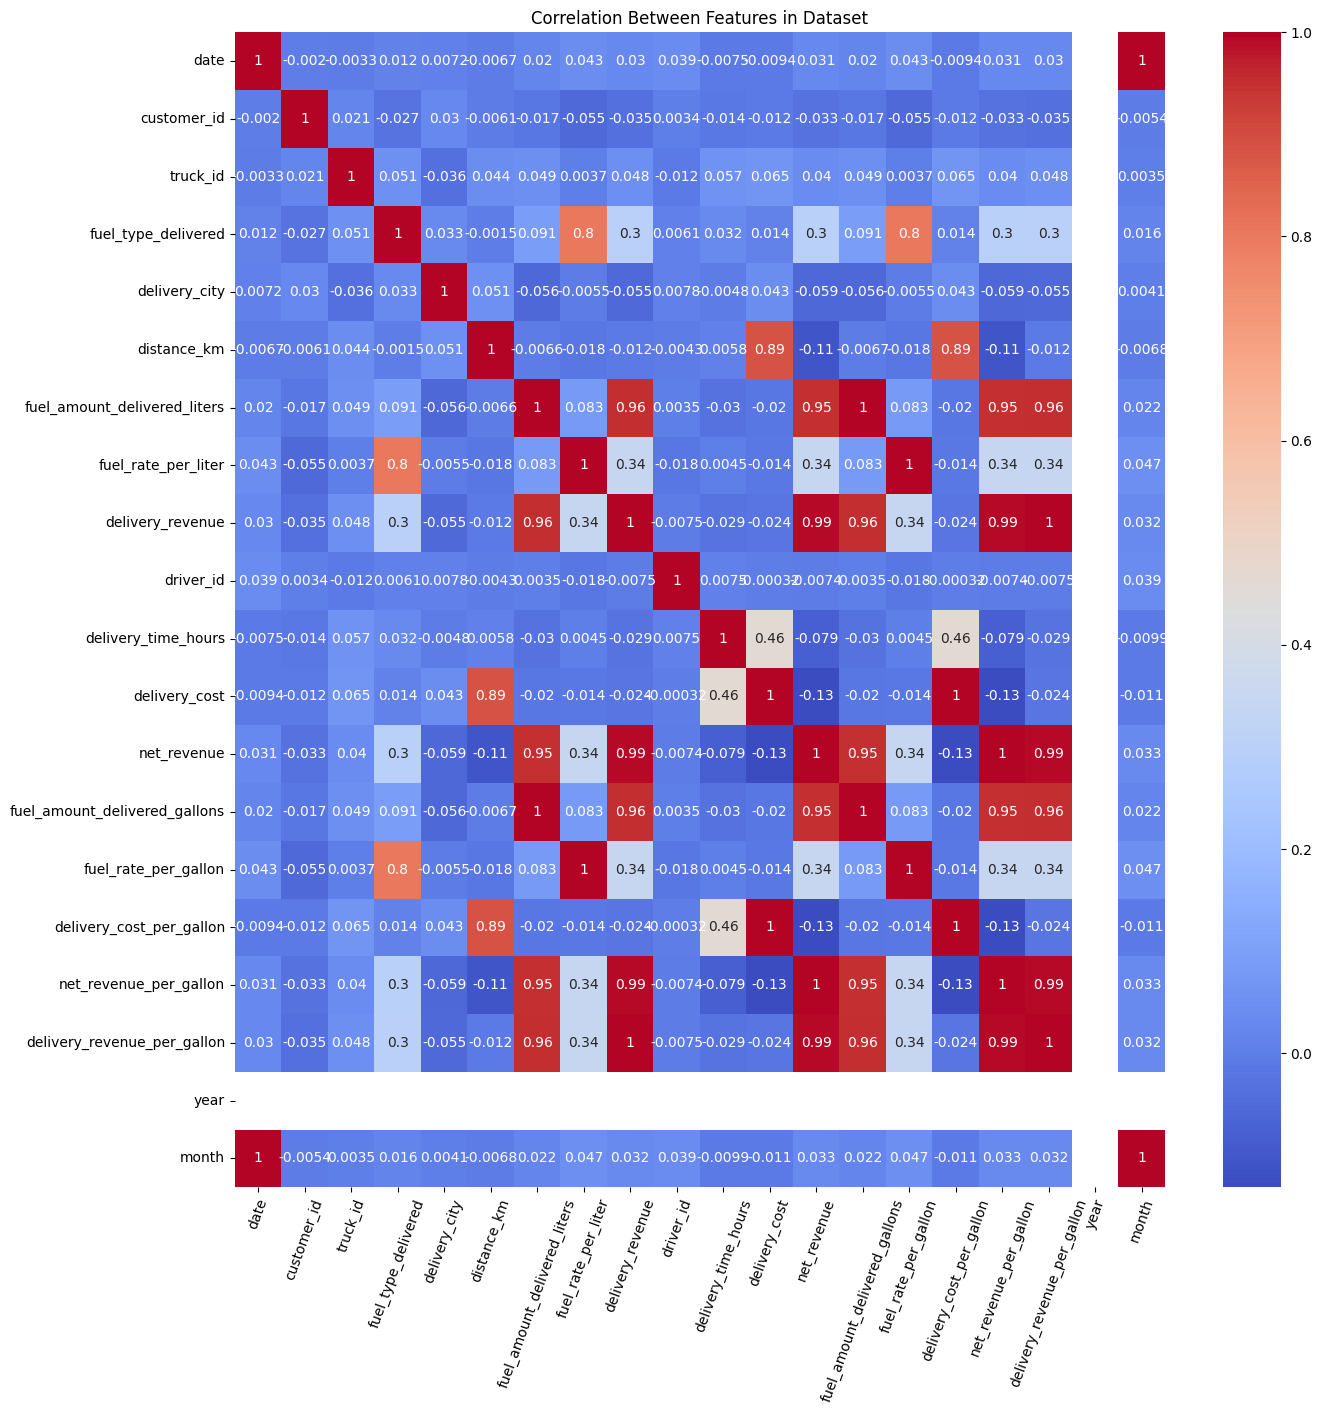

In [18]:
fig = data.corr()
plt.figure(figsize=(15, 15))
correlation_matrix = sns.heatmap(fig, cmap='coolwarm', annot=True)
plt.title("Correlation Between Features in Dataset")
plt.xticks(rotation=70)

plt.show()

### Fuel Type Deliveries by Month

In [19]:
dataset_january = data[data['month'] == 1]
dataset_february = data[data['month'] == 2]
dataset_march= data[data['month'] == 3]
dataset_april = data[data['month'] == 4]
dataset_may = data[data['month'] == 5]
dataset_june = data[data['month'] == 6]
dataset_july = data[data['month'] == 7]
dataset_august = data[data['month'] == 8]
dataset_september= data[data['month'] == 9]
dataset_october = data[data['month'] == 10]
dataset_november = data[data['month'] == 11]
dataset_december = data[data['month'] == 12]

In [20]:

fuel_type_mapping = {0: 'Gasoline', 1: 'Diesel'}

dataset_january.loc[:, 'fuel_type_delivered'] = dataset_january['fuel_type_delivered'].replace(fuel_type_mapping)
dataset_february['fuel_type_delivered'] = dataset_february['fuel_type_delivered'].astype(object).replace(fuel_type_mapping)
dataset_march['fuel_type_delivered'] = dataset_march['fuel_type_delivered'].astype(object).replace(fuel_type_mapping)
dataset_april['fuel_type_delivered'] = dataset_april['fuel_type_delivered'].astype(object).replace(fuel_type_mapping)
dataset_may['fuel_type_delivered'] = dataset_may['fuel_type_delivered'].astype(object).replace(fuel_type_mapping)
dataset_june['fuel_type_delivered'] = dataset_june['fuel_type_delivered'].astype(object).replace(fuel_type_mapping)
dataset_july['fuel_type_delivered'] = dataset_july['fuel_type_delivered'].astype(object).replace(fuel_type_mapping)
dataset_august['fuel_type_delivered'] = dataset_august['fuel_type_delivered'].astype(object).replace(fuel_type_mapping)
dataset_september['fuel_type_delivered'] = dataset_september['fuel_type_delivered'].astype(object).replace(fuel_type_mapping)
dataset_october['fuel_type_delivered'] = dataset_october['fuel_type_delivered'].astype(object).replace(fuel_type_mapping)
dataset_november['fuel_type_delivered'] = dataset_november['fuel_type_delivered'].astype(object).replace(fuel_type_mapping)
dataset_december['fuel_type_delivered'] = dataset_december['fuel_type_delivered'].astype(object).replace(fuel_type_mapping)

### January

### Amount of Diesel vs Amount of Gasoline Deliveries

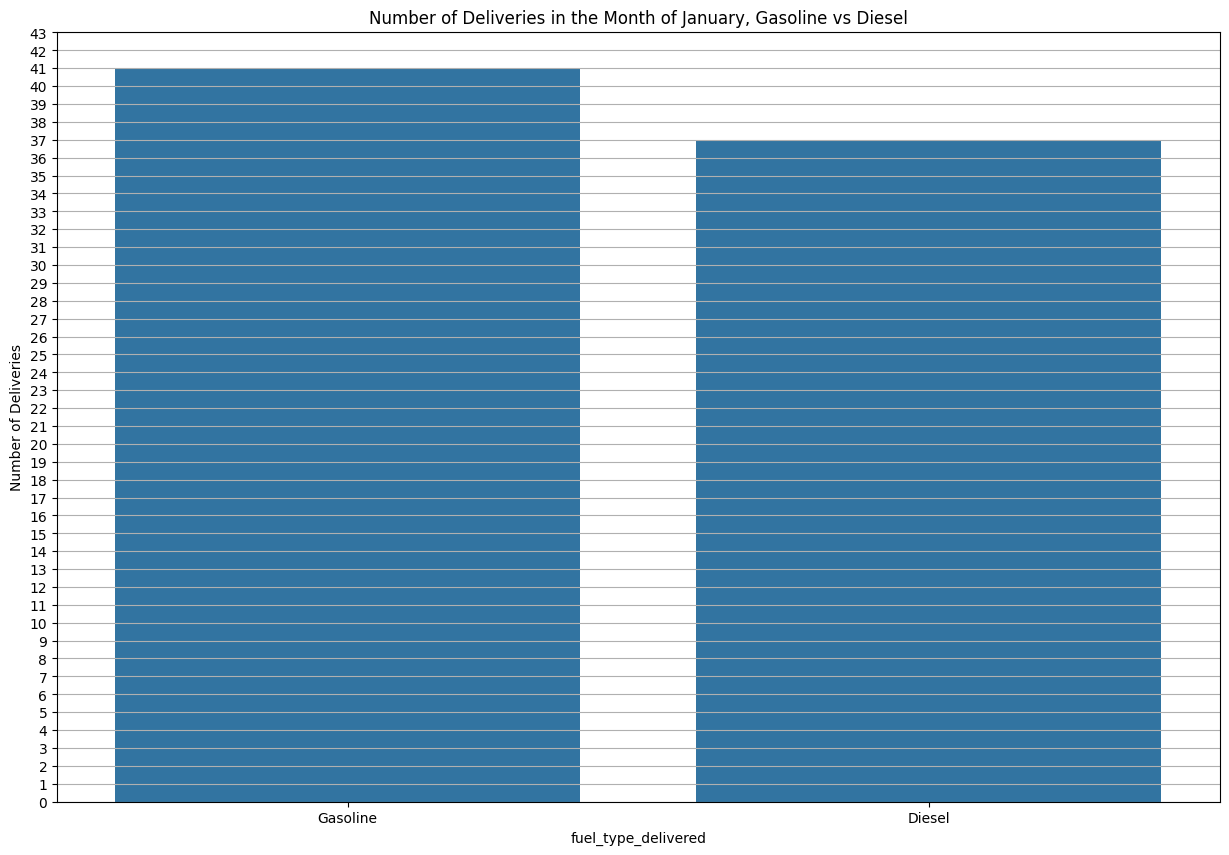

In [21]:

plt.figure(figsize=(15, 10))
sns.countplot(data=dataset_january, x='fuel_type_delivered')

plt.ylabel("Number of Deliveries")
plt.title("Number of Deliveries in the Month of January, Gasoline vs Diesel")

max_count = dataset_january['fuel_type_delivered'].value_counts().max()
y_ticks = range(0, max_count + 3, 1)
plt.yticks(y_ticks)

plt.grid(axis='y')

plt.show()

In [22]:
dataset_january['fuel_type_delivered'].value_counts()

fuel_type_delivered
Gasoline    41
Diesel      37
Name: count, dtype: int64

### Distance Driven by Driver

In [23]:
driver_km_driven_january = dataset_january.groupby('driver_id')['distance_km'].sum().reset_index()

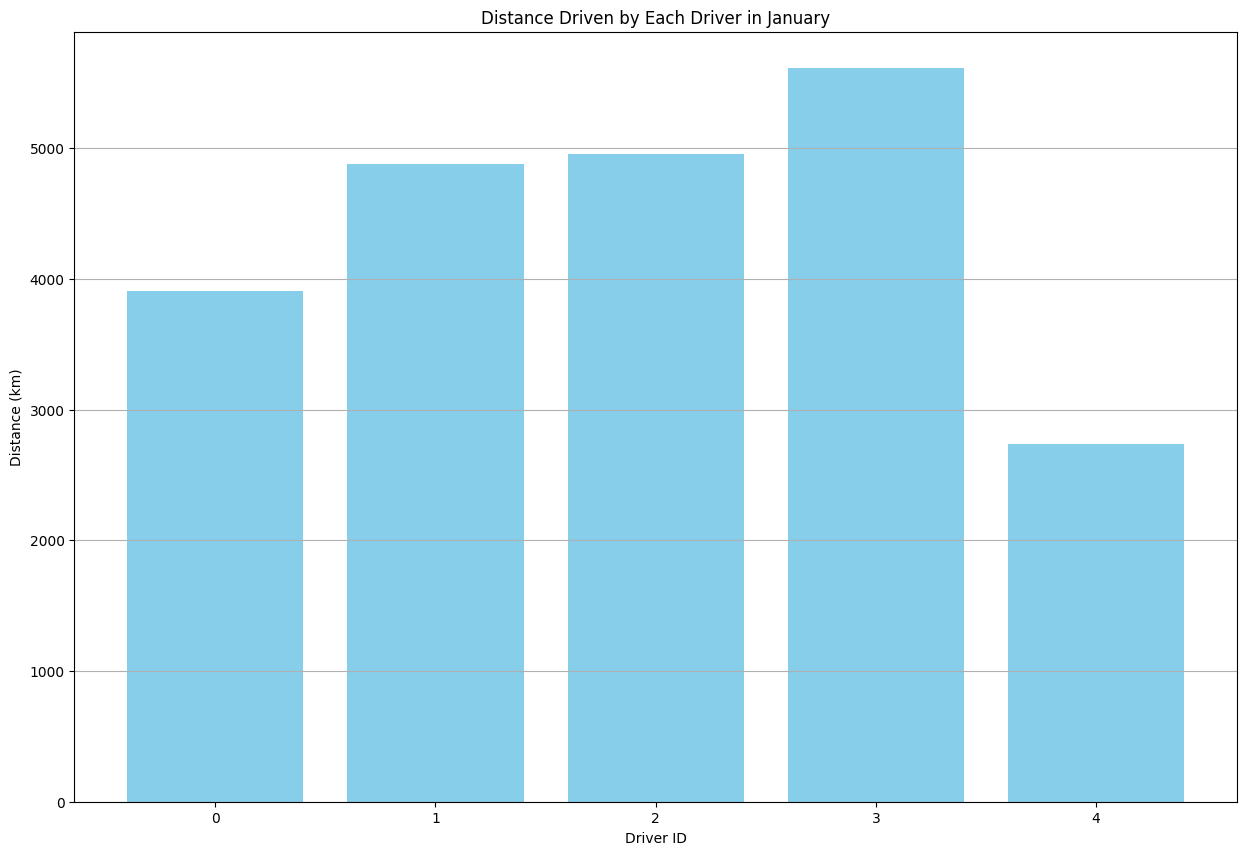

In [24]:

driver_km_driven = pd.DataFrame({
    'driver_id': [0, 1, 2, 3, 4],
    'distance_km': [3904, 4879, 4959, 5611, 2736]
})

plt.figure(figsize=(15, 10))  
plt.bar(driver_km_driven_january['driver_id'], driver_km_driven_january['distance_km'], color='skyblue')


plt.title('Distance Driven by Each Driver in January')
plt.xlabel('Driver ID')
plt.ylabel('Distance (km)')
plt.xticks(driver_km_driven['driver_id']) 
plt.grid(axis='y')


plt.show()

### Delivery Costs in January

### Net Revenue By Driver in January

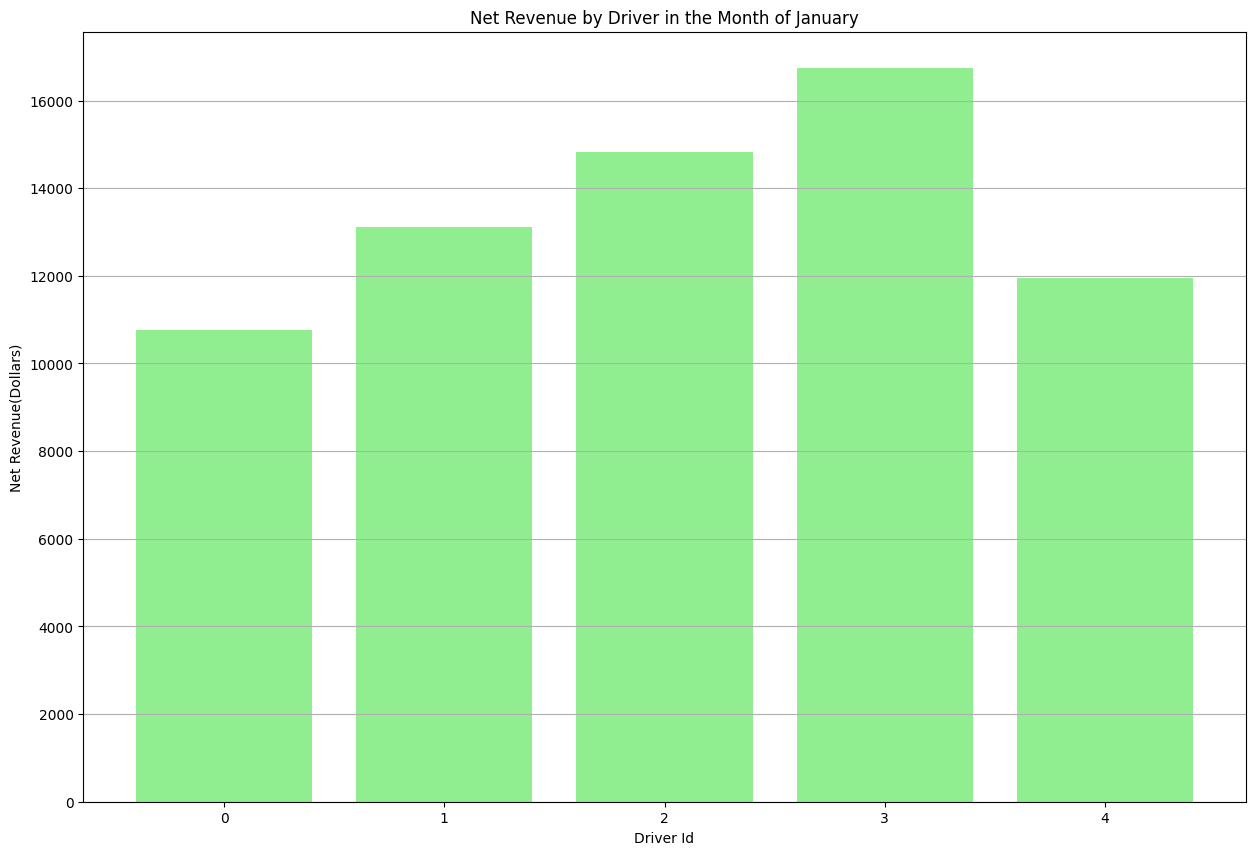

In [25]:
plt.figure(figsize=(15, 10))
plt.bar(dataset_january['driver_id'], dataset_january['net_revenue'], color='lightgreen')
plt.grid(axis='y')
plt.title("Net Revenue by Driver in the Month of January")
plt.xlabel("Driver Id")
plt.ylabel("Net Revenue(Dollars)")
plt.show()

### Driver Delivery Times in January

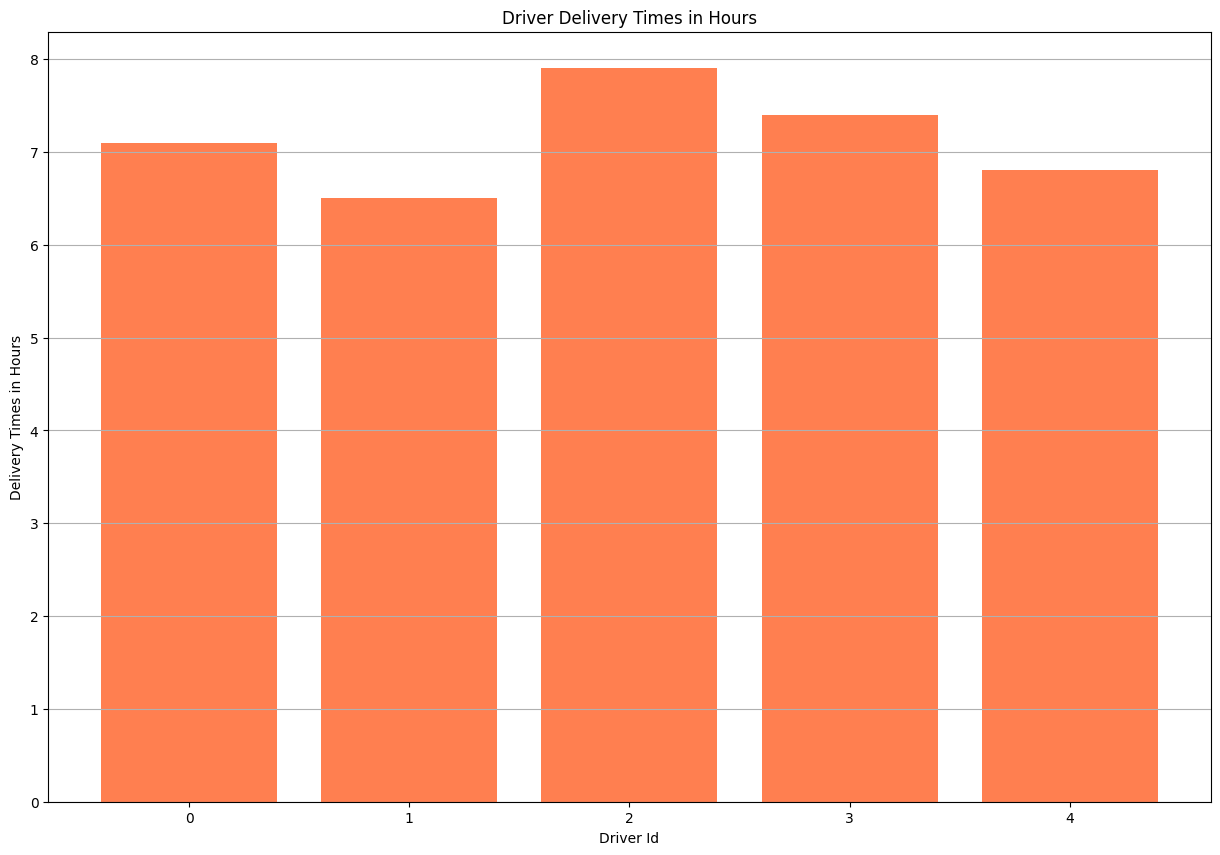

In [26]:
plt.figure(figsize=(15, 10))
plt.bar(dataset_january['driver_id'], dataset_january['delivery_time_hours'], color='coral')
plt.ylabel("Delivery Times in Hours")
plt.xlabel("Driver Id")
plt.title("Driver Delivery Times in Hours")
plt.grid(axis='y')
plt.show()

### Fuel Amount Delivered in Gallons

In [67]:
dataset_january.columns

Index(['date', 'customer_id', 'truck_id', 'fuel_type_delivered',
       'delivery_city', 'distance_km', 'fuel_amount_delivered_liters',
       'fuel_rate_per_liter', 'delivery_revenue', 'driver_id',
       'delivery_time_hours', 'delivery_cost', 'net_revenue',
       'fuel_amount_delivered_gallons', 'fuel_rate_per_gallon',
       'delivery_cost_per_gallon', 'net_revenue_per_gallon',
       'delivery_revenue_per_gallon', 'year', 'month'],
      dtype='object')

### Net Revenue for the Month of January

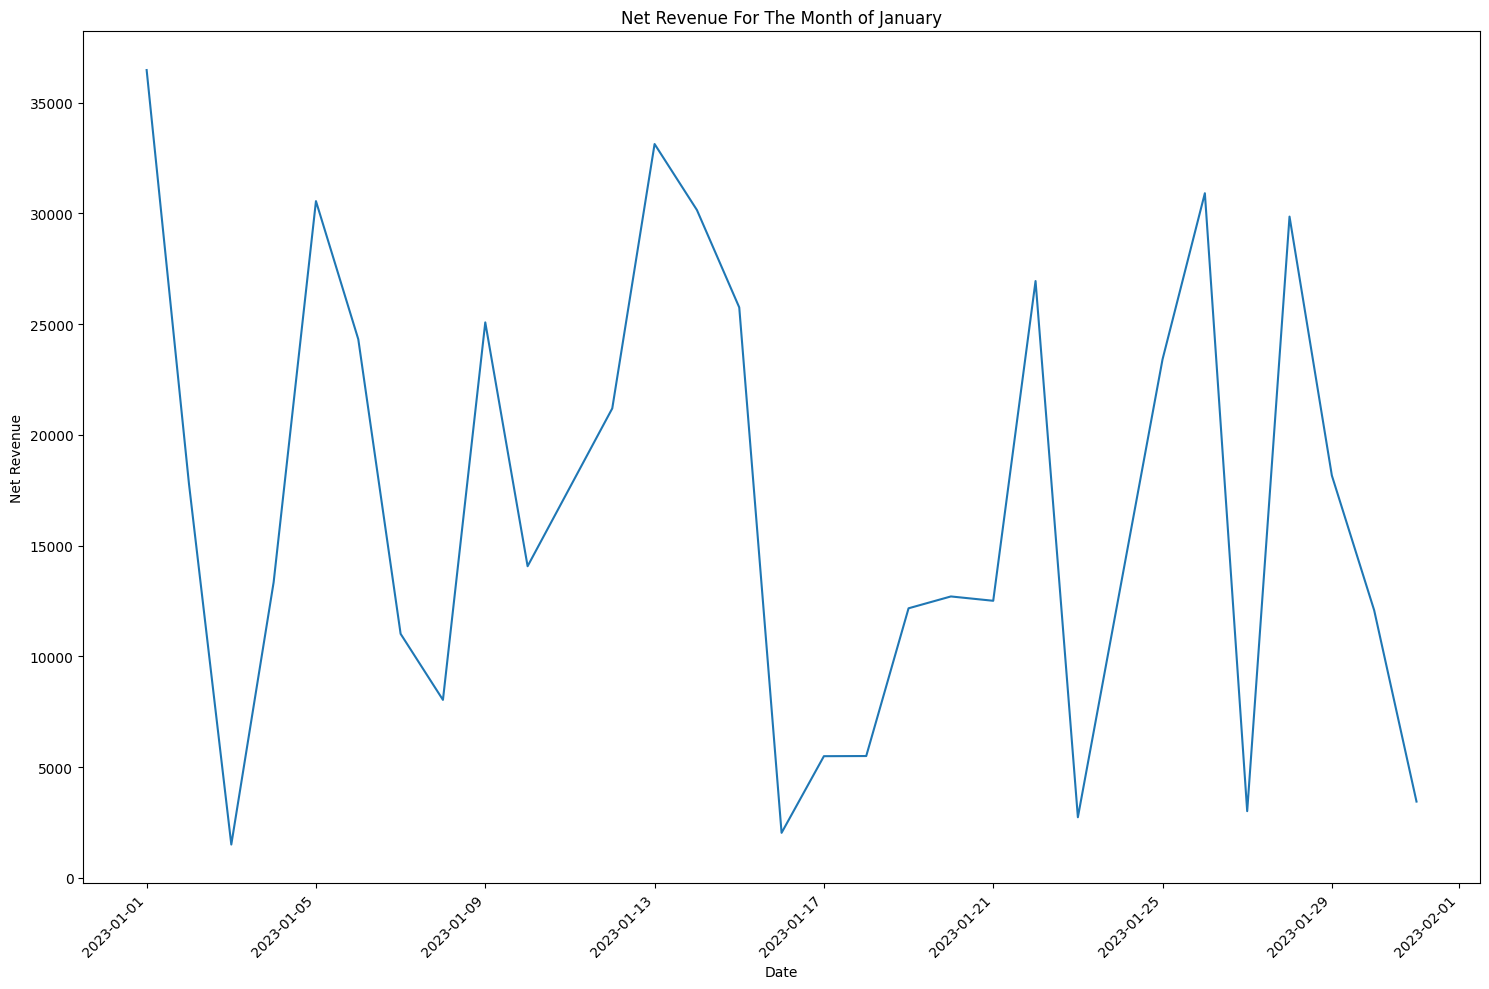

In [49]:

net_revenue_january = dataset_january.groupby('date')['net_revenue'].sum()

plt.figure(figsize=(15, 10))
net_revenue_january.plot()
plt.title('Net Revenue For The Month of January')
plt.xlabel('Date')
plt.ylabel('Net Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### February

### Amount of Diesel vs Amount of Gasoline Deliveries

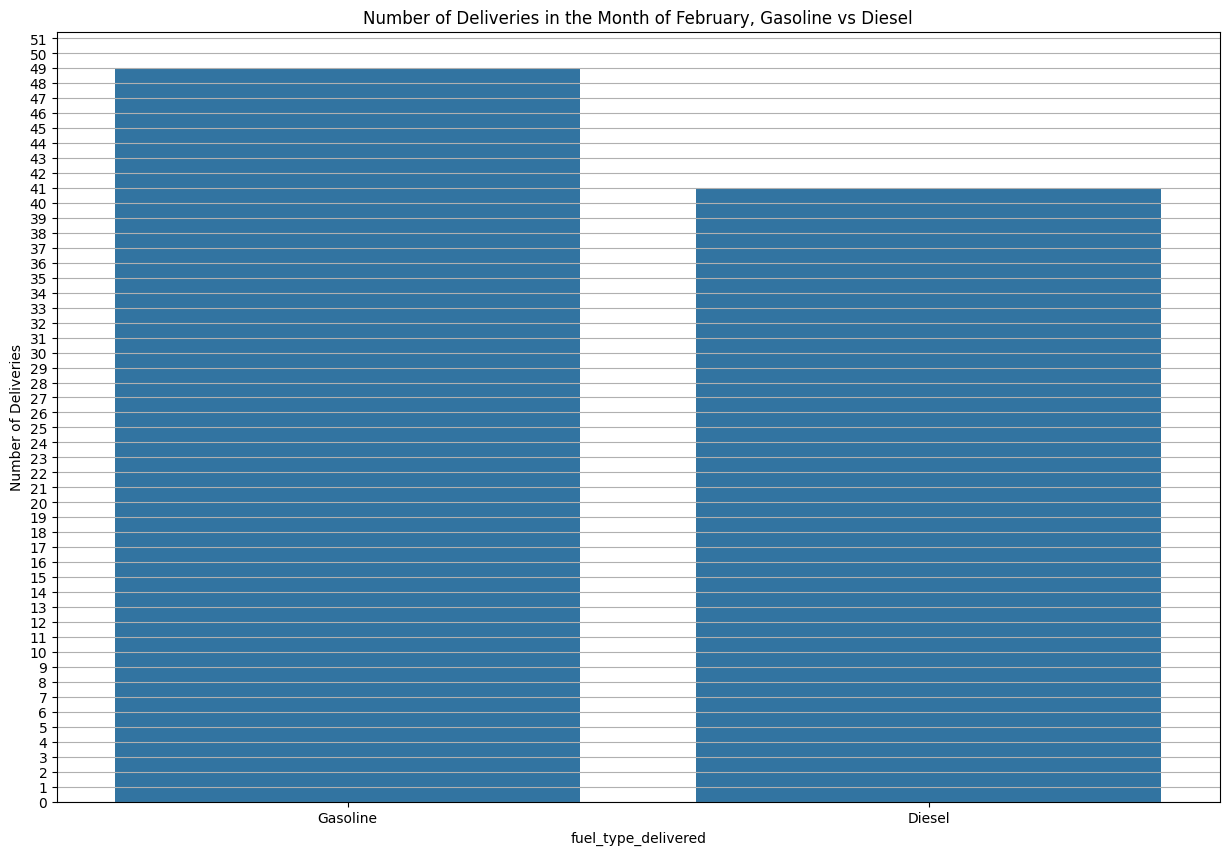

In [27]:

plt.figure(figsize=(15, 10))
sns.countplot(data=dataset_february, x='fuel_type_delivered')

plt.ylabel("Number of Deliveries")
plt.title("Number of Deliveries in the Month of February, Gasoline vs Diesel")

max_count = dataset_february['fuel_type_delivered'].value_counts().max()
y_ticks = range(0, max_count + 3, 1)
plt.yticks(y_ticks)

plt.grid(axis='y')

plt.show()

In [28]:
dataset_february['fuel_type_delivered'].value_counts()

fuel_type_delivered
Gasoline    49
Diesel      41
Name: count, dtype: int64

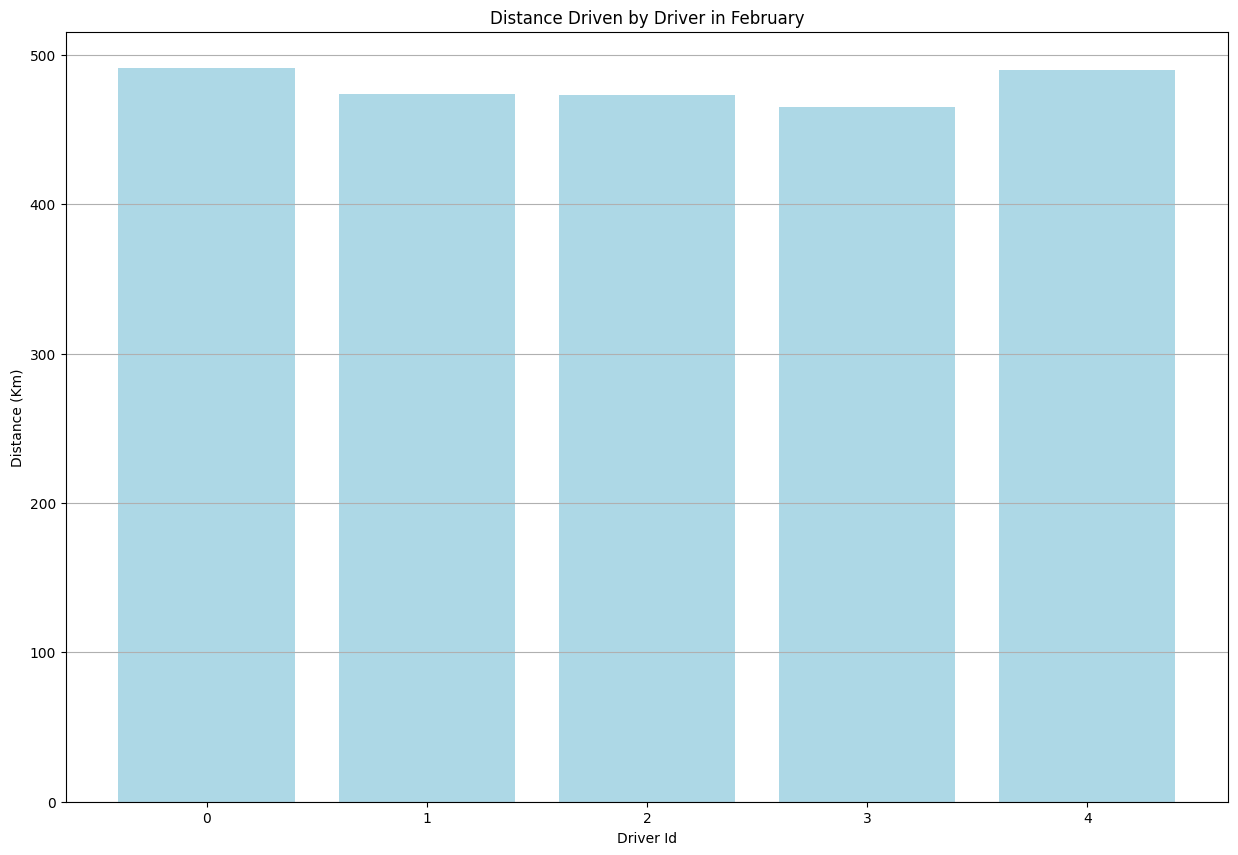

In [29]:
plt.figure(figsize=(15, 10))
plt.bar(dataset_february['driver_id'], dataset_february['distance_km'], color='lightblue')
plt.grid(axis='y')
plt.ylabel("Distance (Km)")
plt.xlabel("Driver Id")
plt.title("Distance Driven by Driver in February")
plt.show()

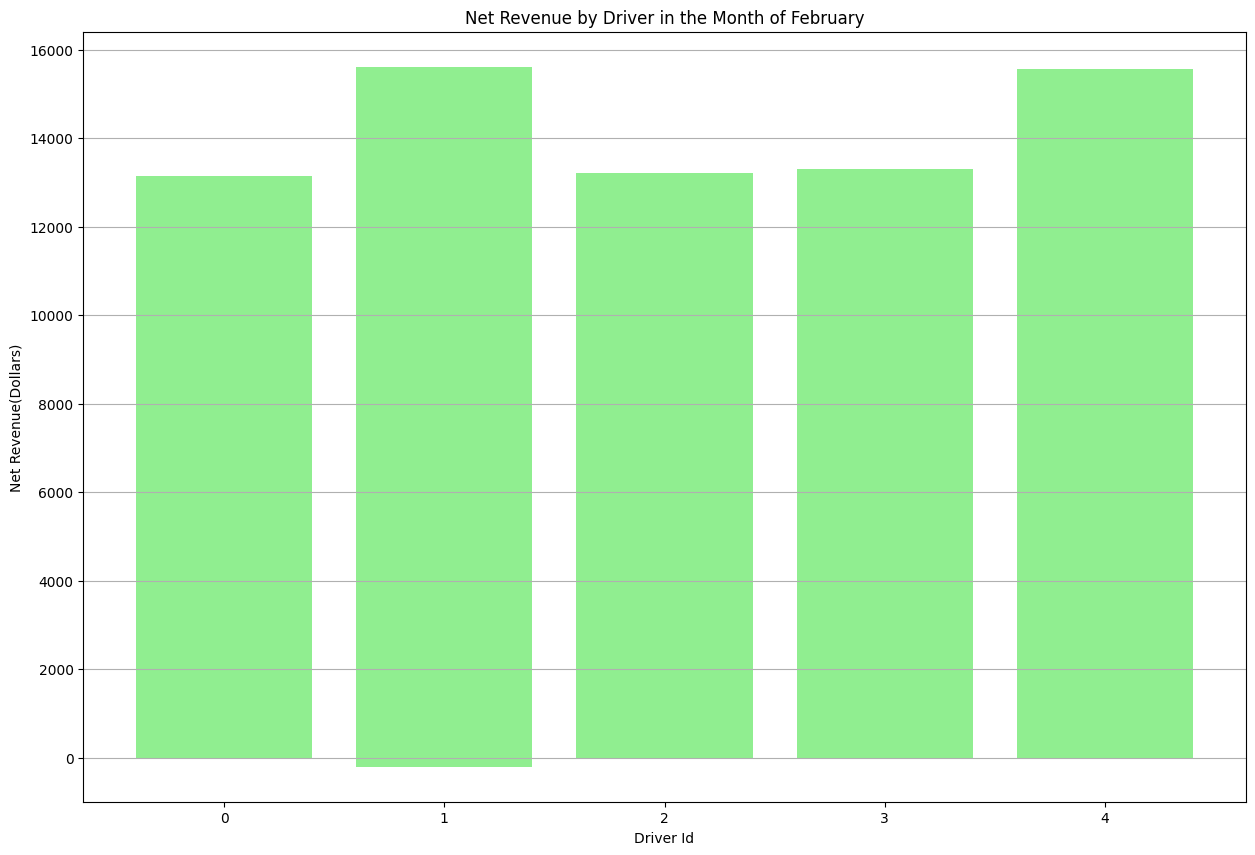

In [30]:
plt.figure(figsize=(15, 10))
plt.bar(dataset_february['driver_id'], dataset_february['net_revenue'], color='lightgreen')
plt.grid(axis='y')
plt.title("Net Revenue by Driver in the Month of February")
plt.xlabel("Driver Id")
plt.ylabel("Net Revenue(Dollars)")
plt.show()

### Net Revenue for February

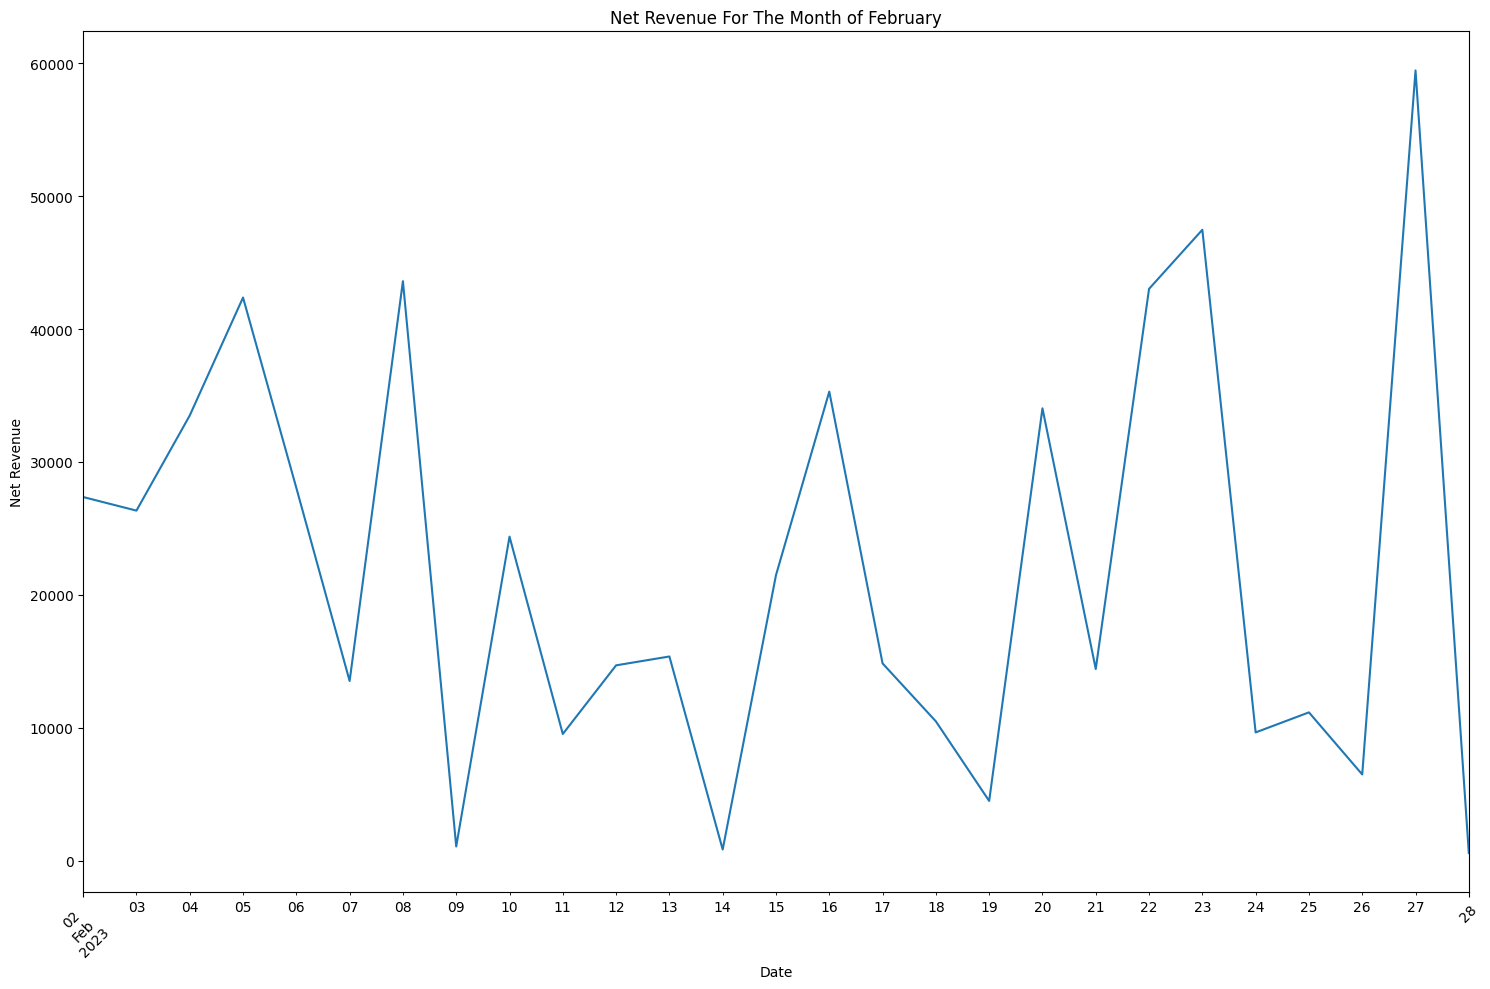

In [48]:

net_revenue_february = dataset_february.groupby('date')['net_revenue'].sum()

# Plot
plt.figure(figsize=(15, 10))
net_revenue_february.plot()
plt.title('Net Revenue For The Month of February')
plt.xlabel('Date')
plt.ylabel('Net Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### March

### Amount of Diesel vs Amount of Gasoline Deliveries

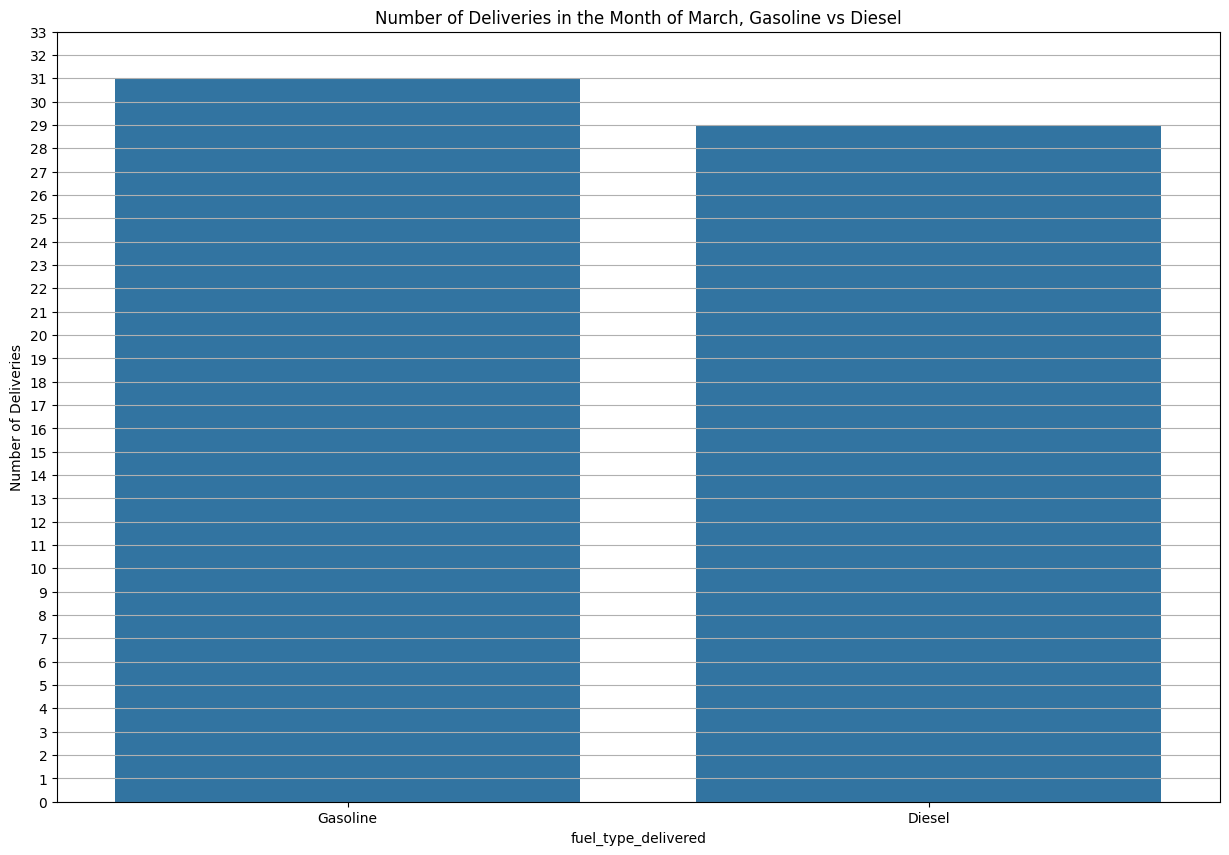

In [31]:

plt.figure(figsize=(15, 10))
sns.countplot(data=dataset_march, x='fuel_type_delivered')

plt.ylabel("Number of Deliveries")
plt.title("Number of Deliveries in the Month of March, Gasoline vs Diesel")

max_count = dataset_march['fuel_type_delivered'].value_counts().max()
y_ticks = range(0, max_count + 3, 1)
plt.yticks(y_ticks)

plt.grid(axis='y')

plt.show()

In [32]:
dataset_march['fuel_type_delivered'].value_counts()

fuel_type_delivered
Gasoline    31
Diesel      29
Name: count, dtype: int64

### Net Revenue for the Month of March

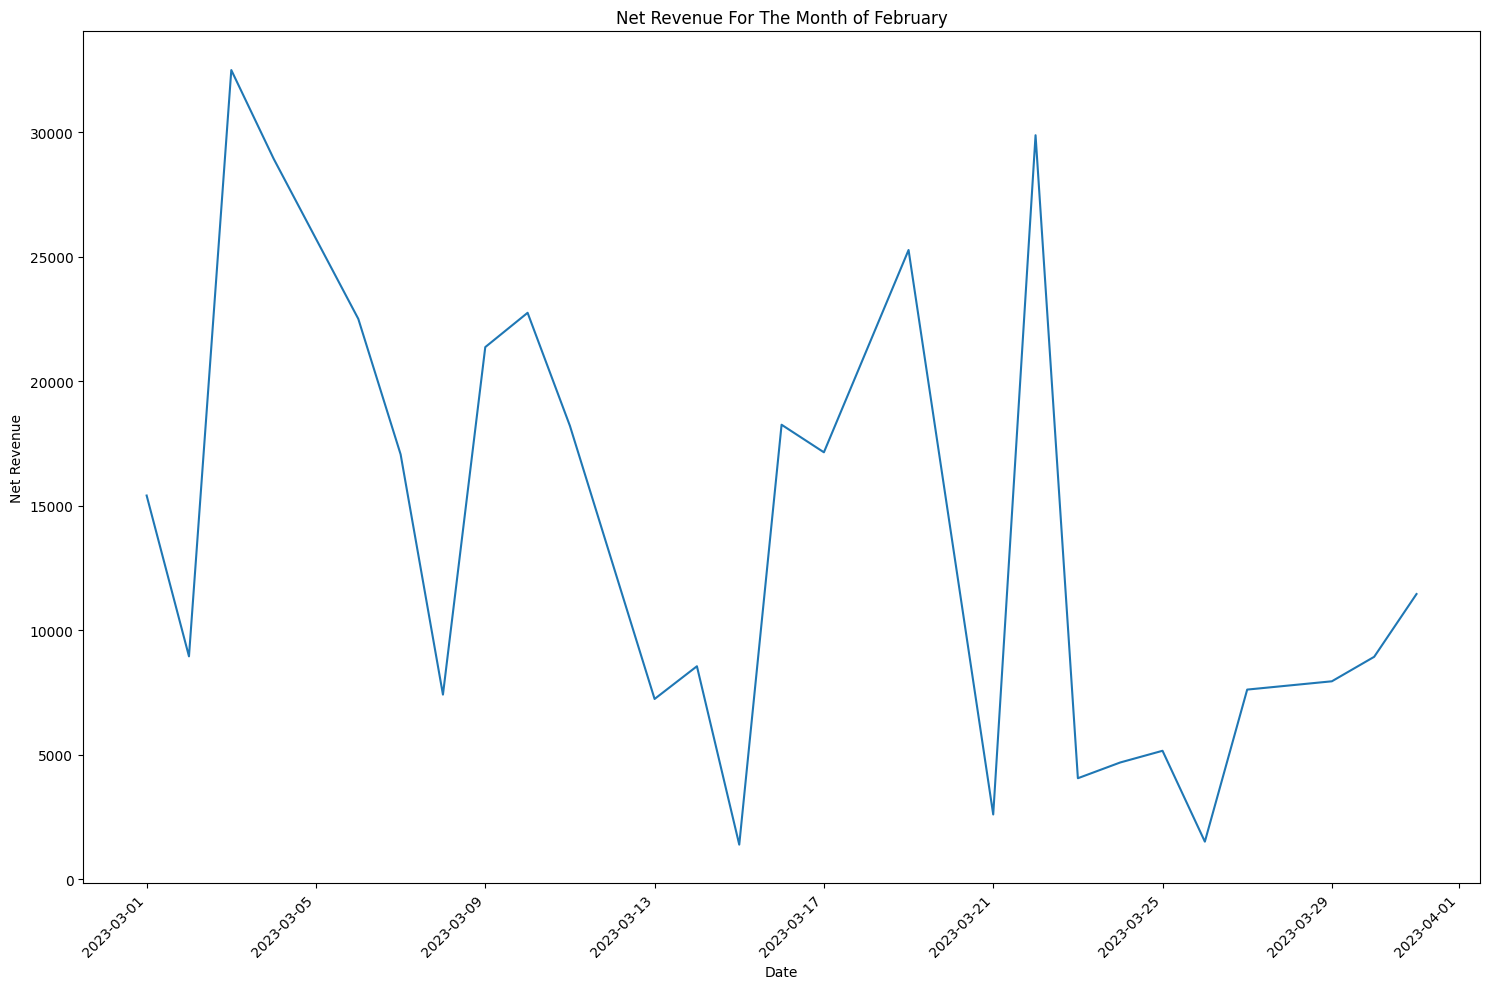

In [50]:
net_revenue_march = dataset_march.groupby('date')['net_revenue'].sum()

# Plot
plt.figure(figsize=(15, 10))
net_revenue_march.plot()
plt.title('Net Revenue For The Month of February')
plt.xlabel('Date')
plt.ylabel('Net Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### October

### Amount of Diesel vs Amount of Gasoline Deliveries

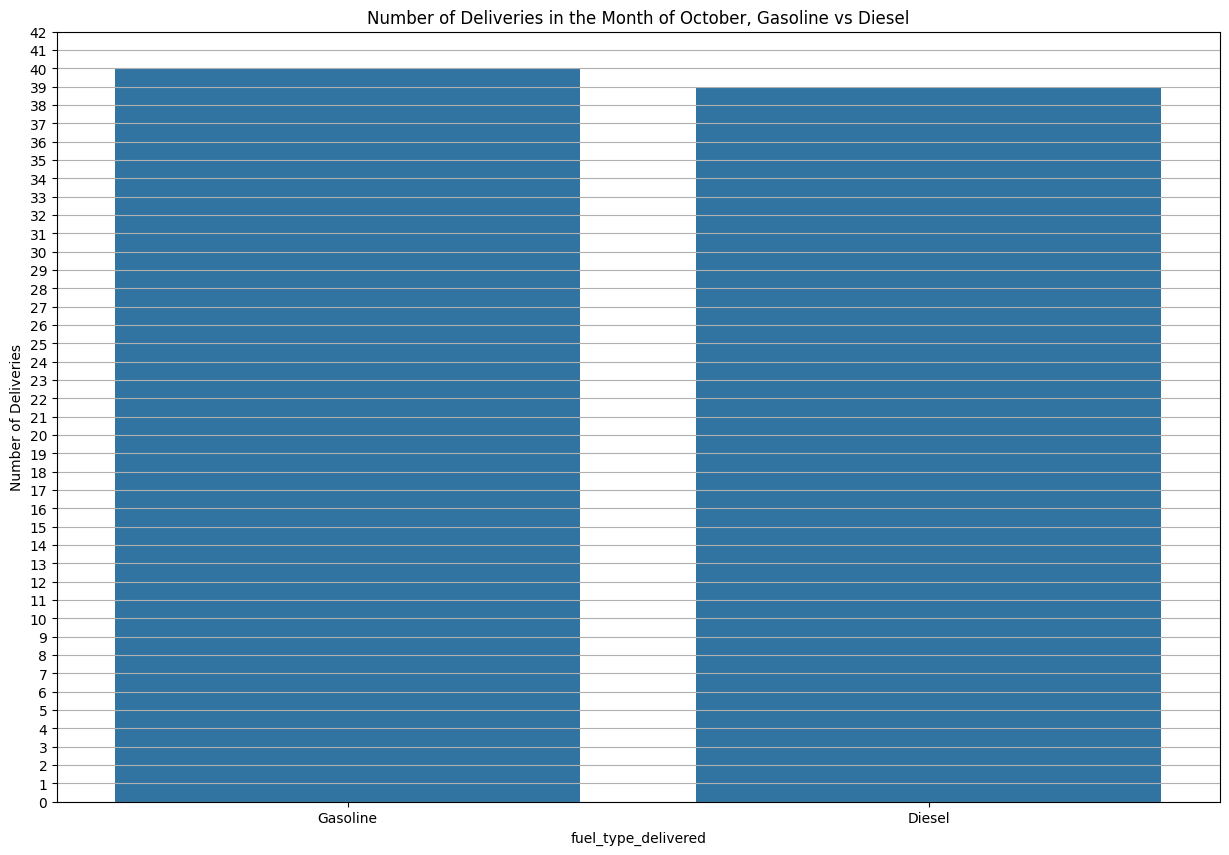

In [33]:

plt.figure(figsize=(15, 10))
sns.countplot(data=dataset_october, x='fuel_type_delivered')

plt.ylabel("Number of Deliveries")
plt.title("Number of Deliveries in the Month of October, Gasoline vs Diesel")

max_count = dataset_october['fuel_type_delivered'].value_counts().max()
y_ticks = range(0, max_count + 3, 1)
plt.yticks(y_ticks)

plt.grid(axis='y')

plt.show()

In [34]:
dataset_october['fuel_type_delivered'].value_counts()

fuel_type_delivered
Gasoline    40
Diesel      39
Name: count, dtype: int64

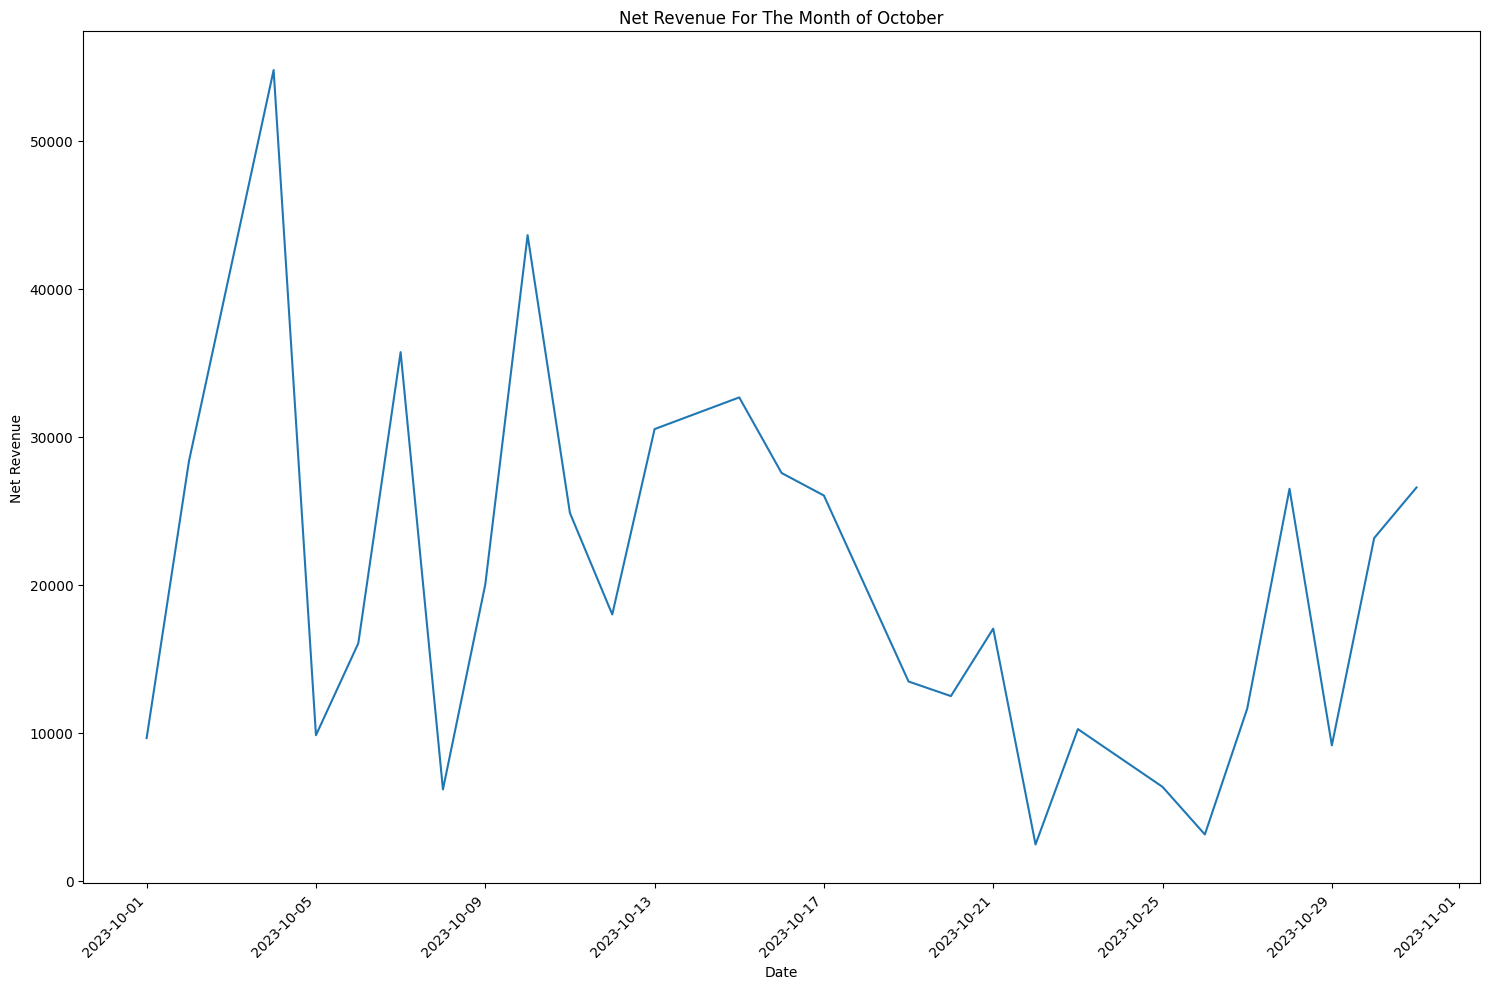

In [51]:
net_revenue_october = dataset_october.groupby('date')['net_revenue'].sum()

# Plot
plt.figure(figsize=(15, 10))
net_revenue_october.plot()
plt.title('Net Revenue For The Month of October')
plt.xlabel('Date')
plt.ylabel('Net Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### November

### Amount of Diesel vs Amount of Gasoline Deliveries

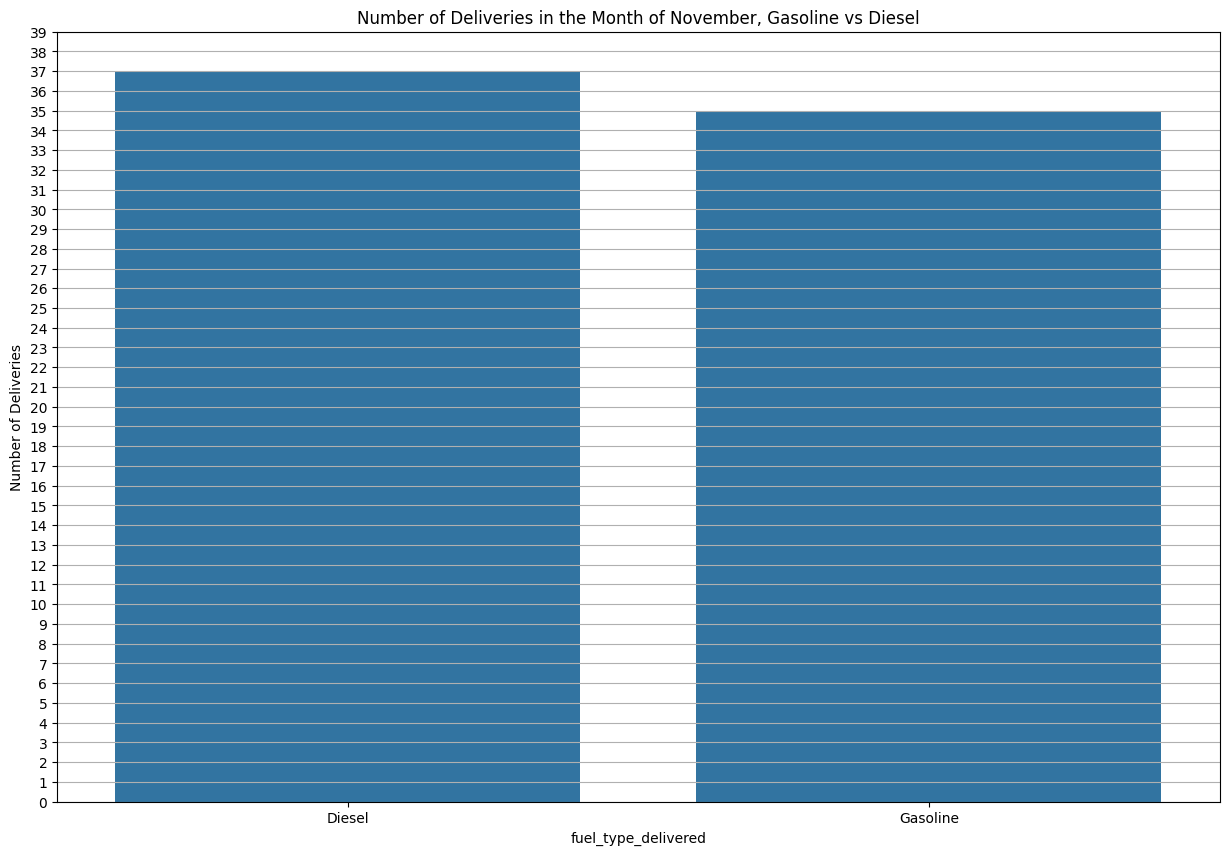

In [35]:
plt.figure(figsize=(15, 10))
sns.countplot(data=dataset_november, x='fuel_type_delivered')

plt.ylabel("Number of Deliveries")
plt.title("Number of Deliveries in the Month of November, Gasoline vs Diesel")

max_count = dataset_november['fuel_type_delivered'].value_counts().max()
y_ticks = range(0, max_count + 3, 1)
plt.yticks(y_ticks)

plt.grid(axis='y')

plt.show()

In [36]:
dataset_november['fuel_type_delivered'].value_counts()

fuel_type_delivered
Diesel      37
Gasoline    35
Name: count, dtype: int64

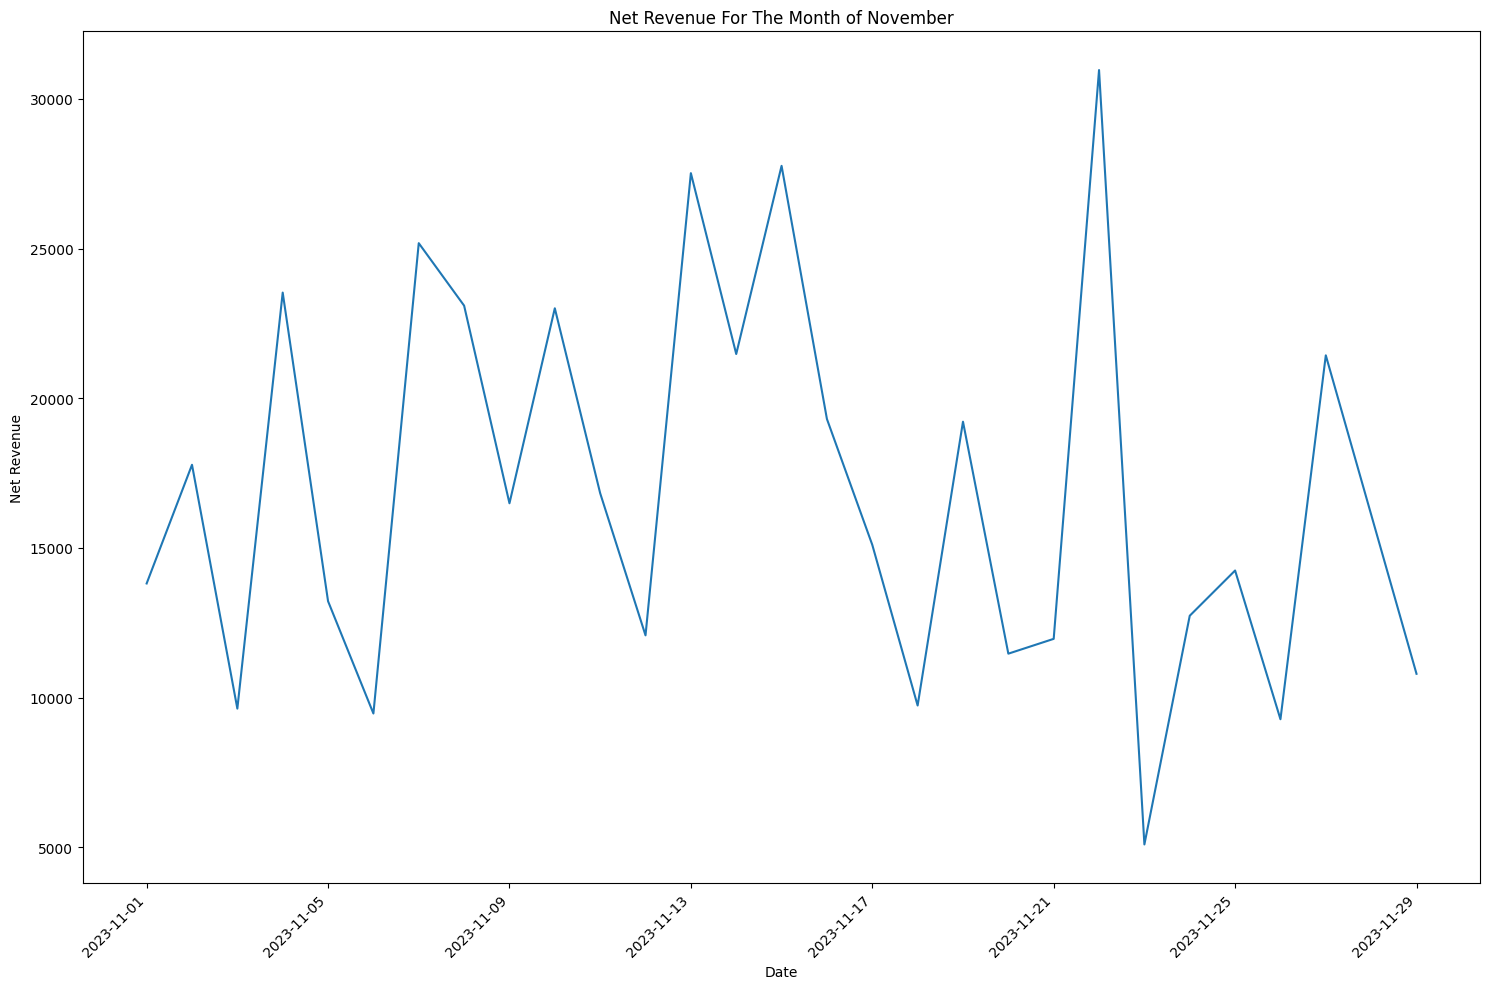

In [52]:
net_revenue_november = dataset_november.groupby('date')['net_revenue'].sum()

# Plot
plt.figure(figsize=(15, 10))
net_revenue_november.plot()
plt.title('Net Revenue For The Month of November')
plt.xlabel('Date')
plt.ylabel('Net Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### December

### Amount of Diesel vs Amount of Gasoline Deliveries

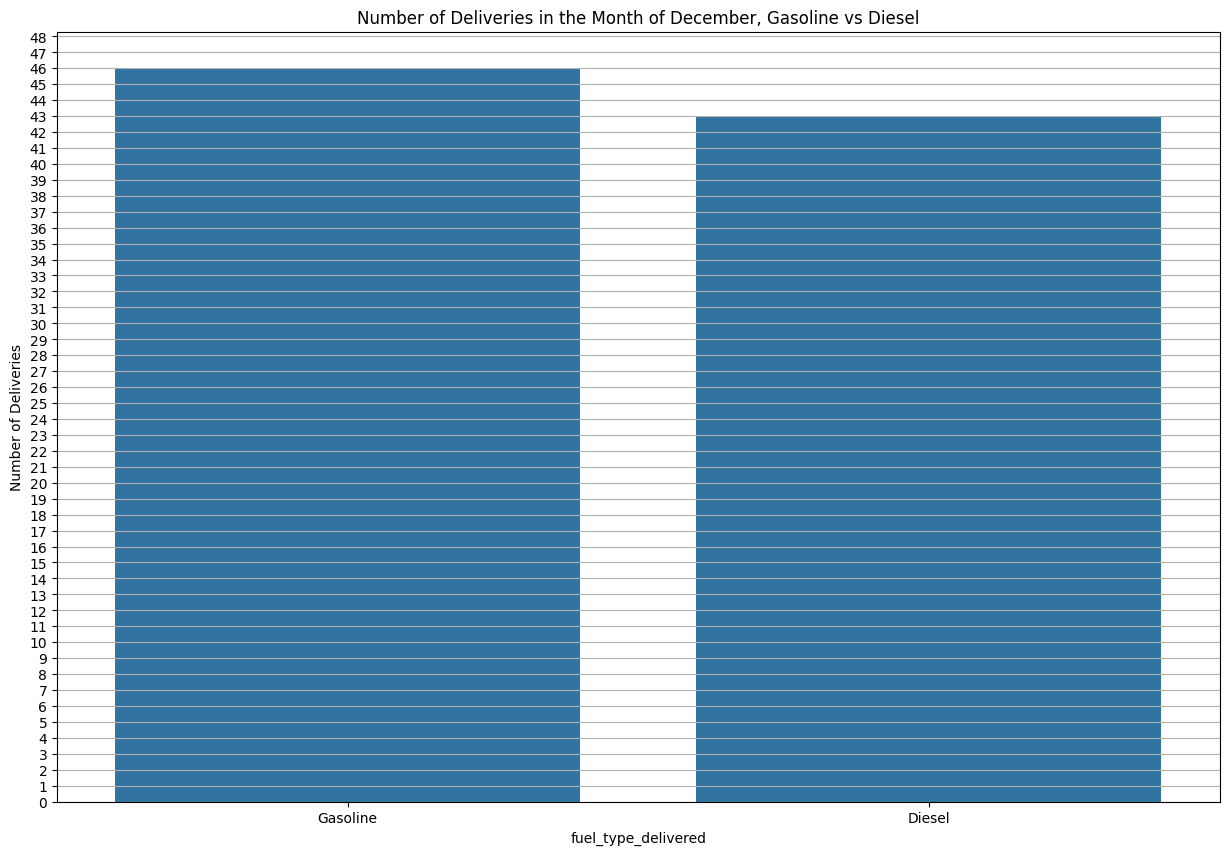

In [37]:

plt.figure(figsize=(15, 10))
sns.countplot(data=dataset_december, x='fuel_type_delivered')

plt.ylabel("Number of Deliveries")
plt.title("Number of Deliveries in the Month of December, Gasoline vs Diesel")

max_count = dataset_december['fuel_type_delivered'].value_counts().max()
y_ticks = range(0, max_count + 3, 1)
plt.yticks(y_ticks)

plt.grid(axis='y')

plt.show()

In [38]:
dataset_december['fuel_type_delivered'].value_counts()

fuel_type_delivered
Gasoline    46
Diesel      43
Name: count, dtype: int64

### Net Revenue for the month of December

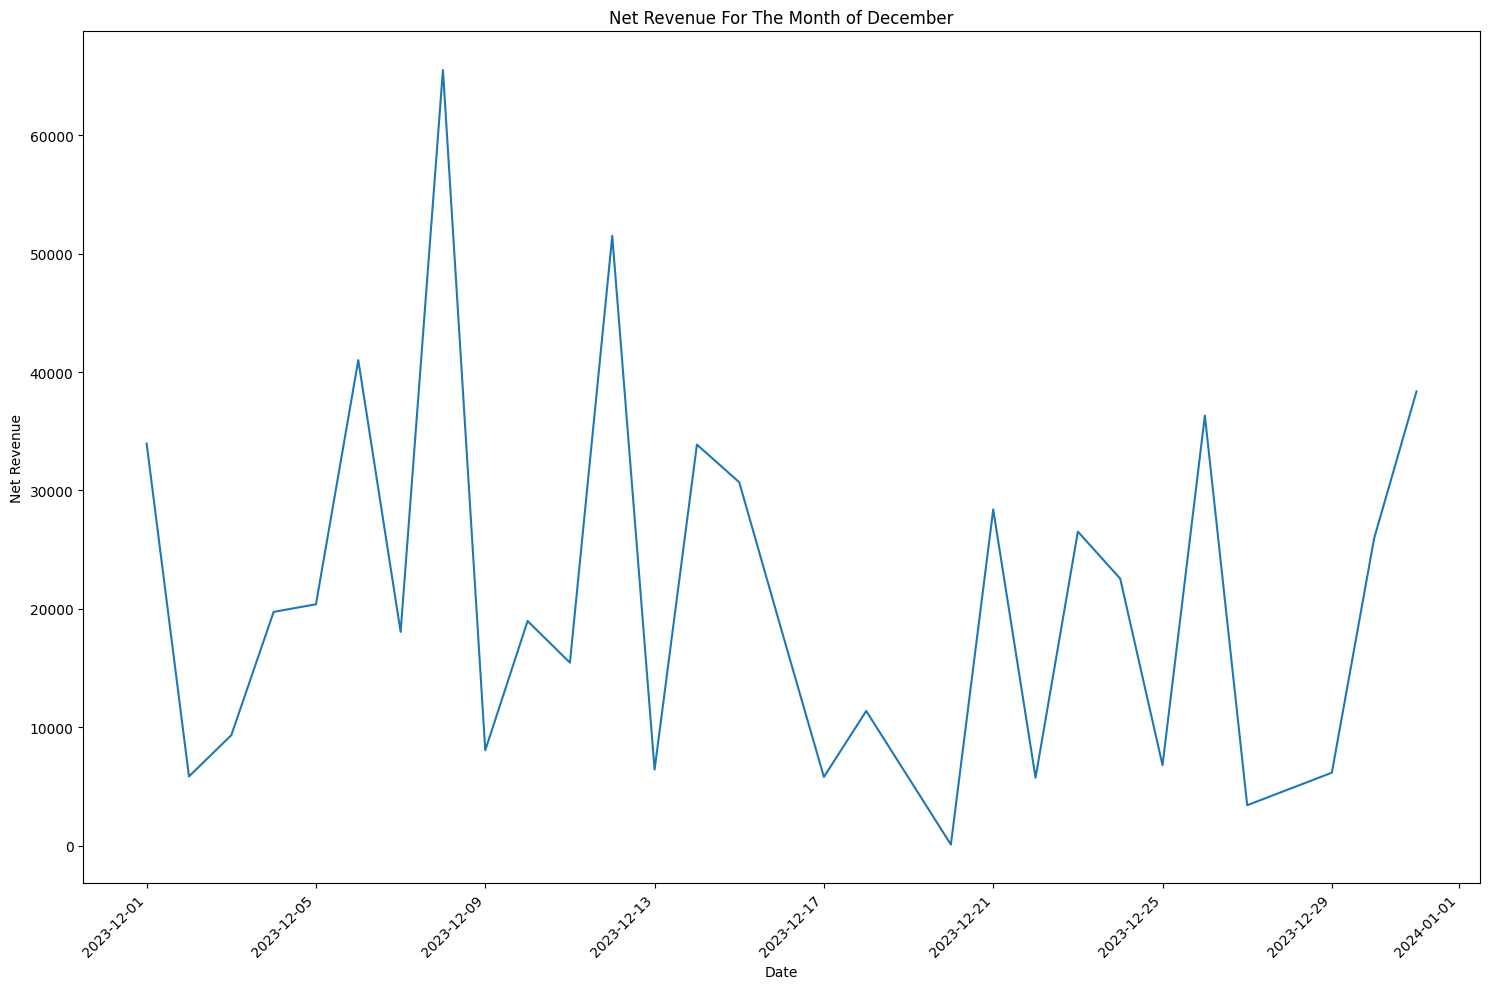

In [53]:
net_revenue_december = dataset_december.groupby('date')['net_revenue'].sum()

# Plot
plt.figure(figsize=(15, 10))
net_revenue_december.plot()
plt.title('Net Revenue For The Month of December')
plt.xlabel('Date')
plt.ylabel('Net Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()